# Create Prediction Forecast Endpointd
1. Load CSV 
2. Test Pickle
3. Create Prediction Function
4. Create Visualization Function
5. Test Prediction and Visualization Function

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

## 1. Load CSV

In [29]:
population_melt = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_melt.csv')
population = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv')

## 3. Create Prediction Function

In [38]:
def population_forecast(city, periods):
    # Load Dataset
  population = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv')
  population.reset_index(level=0, inplace=True)

  # Melt table into ds and y
  population_melt = population[['City,State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
  population_melt = population_melt.melt(id_vars=['City,State'], var_name='ds', value_name='y')

  # Isolate city data
  city = [city]
  df_ = population_melt.loc[population_melt['City,State'].isin(city)][['ds', 'y']]
  df_.columns = ['ds','y']

  # Fit and Predict on city dataframe
  m = Prophet(interval_width=0.95)
  m.fit(df_)
  future = m.make_future_dataframe(periods=periods, freq='Y')
  forecast = m.predict(future)
  predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  predictions['ds'] = pd.DatetimeIndex(predictions['ds']).year
  predictions[['yhat', 'yhat_lower', 'yhat_upper']] =  predictions[['yhat', 'yhat_lower', 'yhat_upper']].round()

  # Create graph
  ax = population_melt.plot(x = 'ds', y = 'y', label='Observed', figsize= (10, 8))

  predictions[['ds', 'yhat']].plot(ax = ax, x = 'ds', y = 'yhat', label = "Forecast")
  print(predictions)
  ax.fill_between(predictions['ds'],
                predictions['yhat_lower'],
                predictions['yhat_upper'],
                color='k', 
                alpha=.25)

  ax.set_xlabel('Year')
  ax.set_ylabel('Population')
  plt.title(f"{city} Population" )
  plt.legend()

  return predictions,   plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
<ipython-input-38-cd55bf091852>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['ds'] = pd.DatetimeIndex(predictions['ds']).year
/Users/jisha/.pyenv/versions/3.8.6/lib/python3.8/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

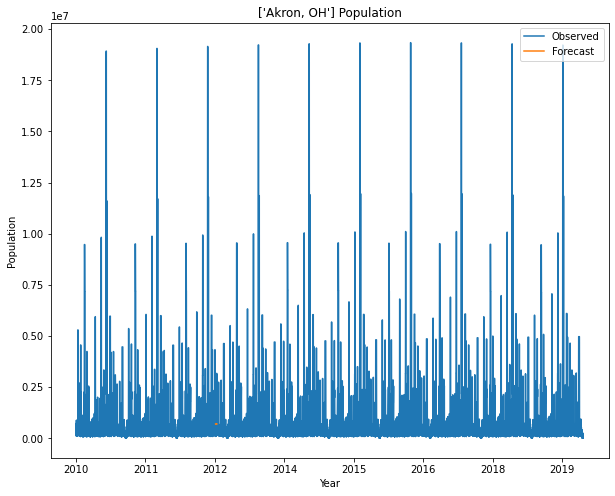

(      ds      yhat  yhat_lower  yhat_upper
 0   2010  703031.0    703031.0    703031.0
 1   2011  703200.0    703200.0    703200.0
 2   2012  702109.0    702109.0    702109.0
 3   2013  703621.0    703621.0    703621.0
 4   2014  704908.0    704908.0    704908.0
 5   2015  704382.0    704382.0    704382.0
 6   2016  703524.0    703524.0    703524.0
 7   2017  703987.0    703987.0    703987.0
 8   2018  703855.0    703855.0    703855.0
 9   2019  703479.0    703479.0    703479.0
 10  2019  699527.0    698279.0    700955.0
 11  2020  702177.0    698428.0    706269.0
 12  2021  701343.0    693879.0    708330.0
 13  2022  700448.0    690139.0    711240.0
 14  2023  699541.0    685502.0    714151.0
 15  2024  702190.0    684369.0    721327.0
 16  2025  701356.0    679550.0    725844.0
 17  2026  700462.0    674859.0    729534.0
 18  2027  699554.0    669658.0    734304.0
 19  2028  702204.0    667978.0    741941.0,
 None)

In [39]:
population_forecast('Akron, OH', 10)

## 4. Create Visualization Function

In [32]:
import matplotlib.pyplot as plt

In [33]:
def get_plot(city, periods):
  city = [city]
  population = pd.read_csv('https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv')
  population = population[population['City,State'].isin(city)]
  population = population[['City,State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
  population_melt = population.melt(id_vars=['City,State'], var_name='ds', value_name='y')
  print(population_melt)
  ax = population_melt.plot(x = 'ds', y = 'y', label='Observed', figsize= (10, 8))

  df = population_forecast(city, periods) # -> thisr returns an empty dataset
  df[['ds', 'yhat']].plot(ax = ax, x = 'ds', y = 'yhat', label = "Forecast")
  print(df)
  ax.fill_between(df['ds'],
                df['yhat_lower'],
                df['yhat_upper'],
                color='k', 
                alpha=.25)

  ax.set_xlabel('Year')
  ax.set_ylabel('Population')
  plt.title(f"{city} Population" )
  plt.legend()

  plt.show()

In [34]:
get_plot('Akron, OH', 10)

  City,State    ds         y
0  Akron, OH  2010  703031.0
1  Akron, OH  2011  703200.0
2  Akron, OH  2012  702109.0
3  Akron, OH  2013  703621.0
4  Akron, OH  2014  704908.0
5  Akron, OH  2015  704382.0
6  Akron, OH  2016  703524.0
7  Akron, OH  2017  703987.0
8  Akron, OH  2018  703855.0
9  Akron, OH  2019  703479.0


ValueError: Dataframe has less than 2 non-NaN rows.

In [ ]:
POPULATION_CSV = 'https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_cleaned.csv'
FORECAST_CSV = 'https://raw.githubusercontent.com/jiobu1/labspt15-cityspire-g-ds/main/notebooks/model/population2010-2019/csv/population_prediction.csv'

def get_plot(city):
  city = [city]
  population = pd.read_csv(POPULATION_CSV)
  population = population[population['City,State'].isin(city)]
  population = population[['City,State', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
  population_melt = population.melt(id_vars=['City,State'], var_name='ds', value_name='y')
  population_melt['ds'] = population_melt['ds'].astype(int)
  print(population_melt)
  ax = population_melt.plot(x = 'ds', y = 'y', label='Observed', figsize= (10, 8))
  forecast = pd.read_csv(FORECAST_CSV)
  df = forecast[forecast['City,State'].isin(city)][-10:]
  df['year'] = df['year'].astype(int)
  print(df)
  df[['year', 'yhat']].plot(ax = ax, x = 'year', y = 'yhat', label = "Forecast")
  ax.fill_between(df['year'],
                df['yhat_lower'],
                df['yhat_upper'],
                color='k', 
                alpha=.25)

  ax.set_xlabel('Year')
  ax.set_ylabel('Population')
  plt.title(f"{city} Population" )
  plt.legend()

  plt.show()

In [ ]:
get_plot('Akron, OH')